# Houses Price

## Introducao

O projeto final do curso de Inteligência Artificial tem como objetivo permitir que os alunos apliquem os conhecimentos adquiridos durante o semestre em um projeto prático e desafiador. Neste projeto, vocês trabalharão em equipes de três pessoas para desenvolver sistemas de IA que envolvem análise exploratória de dados (EDA), pré-processamento, classificação e regressão usando técnicas como K-Nearest Neighbors (KNN), Naive Bayes, Árvore de Decisão, Regressão Linear, Regressão Logística, Redes Neurais.

## Descrição do Projeto:

Vocês têm a liberdade de escolher duas bases de dados de sua preferência no Kaggle, com um conjunto de dados destinado à tarefa de regressão e outro à tarefa de classificação. Vocês devem dividir o projeto em duas partes principais:

## Parte 1: Tarefa de Regressão -> 5 pontos

Nesta parte do projeto, vocês selecionarão uma base de dados adequada para uma tarefa de regressão. Alguns exemplos incluem previsão de preços de imóveis, previsão de vendas, ou qualquer conjunto de dados que envolva a previsão de um valor numérico. Vocês seguirão os seguintes passos:

1. Seleção de Dados: Escolha uma base de dados apropriada no Kaggle para a tarefa de regressão. A base precisa passar por uma aprovação do professor.

2. Pré-processamento: Realize pré-processamento de dados, incluindo tratamento de valores ausentes, codificação de variáveis categóricas e normalização.

3. Análise Exploratória de Dados (EDA): Realize uma análise exploratória dos dados para entender a relação entre as variáveis e identificar padrões.

4. Modelos de Regressão: Implemente 3 modelos de regressão, utilizando Regressão Linear, Árvore de Decisão e Redes Neurais, para prever o valor-alvo.

5. Avaliação e Apresentação: Avalie o desempenho dos modelos e prepare uma apresentação detalhando o processo, os resultados e as conclusões.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeRegressor, plot_tree
from pprint import pprint

import os
from pathlib import Path

### 1. Selecao de Dados

O Dataset escolhido para trabalhar nesse projeto foi o Houses Price.

O objetivo para esse estudo é conseguir determinar os preços de venda.

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [67]:
## Importacao dos dados  
current_dir = Path().resolve()

path_train = os.path.join(current_dir, '..', 'data', 'regression', 'train.csv')
path_test = os.path.join(current_dir, '..', 'data', 'regression', 'test.csv')

train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [68]:
## Verificando os Dados Importados

print('train:', train.shape, 'test:', test.shape)
train.info()
train.describe()
train.columns

train: (1460, 81) test: (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    14

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2 Análise Exploratória
### Entendimento dos Dados

Para poder atingir bons resultados é necessário entender esses dados escolhidos, para isso vamos fazer uma análise exploratória dos dados. Em seguida para ter maior aproveitamento vamos aproveitar para fazer o Pre-Processamento desses dados.

#### Distribuição da Variável Alvo (SalePrice) 

Verificamos a distribuição da variável SalePrice, que representa o preço de venda das casas. Essa análise nos ajudará a identificar se a transformação é necessária devido à dispersão ou assimetria dos dados.


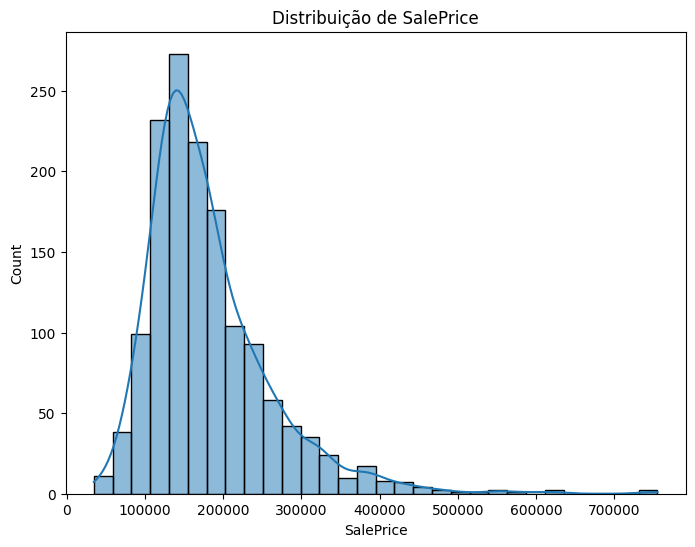

In [69]:
plt.figure(figsize=(8, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title("Distribuição de SalePrice")
plt.show()

#### Correlação

A Correlação indica de forma clara a relação linear entre dois atributos.


Neste projeto, analisamos um conjunto de dados com 225 colunas para identificar as 30 colunas com maior correlação ao **SalePrice**. Definimos os conjuntos de colunas  $C_{pos}  $ que são as 15 mais correlacionadas diretamente proporcional e  $C_{neg}$ que são as 15 mais correlacionadas inversamente proporcional, e juntamos todos para analisar.

Ao analisar, consideramos que as colunas que vamos manter devem satisfazer $|K| > 0.4$, onde $K$ representa a correlaçao entre SalesPrice e uma coluna qualquer.

$K \in (-1, -0.4) \cup (0.4, 1)$



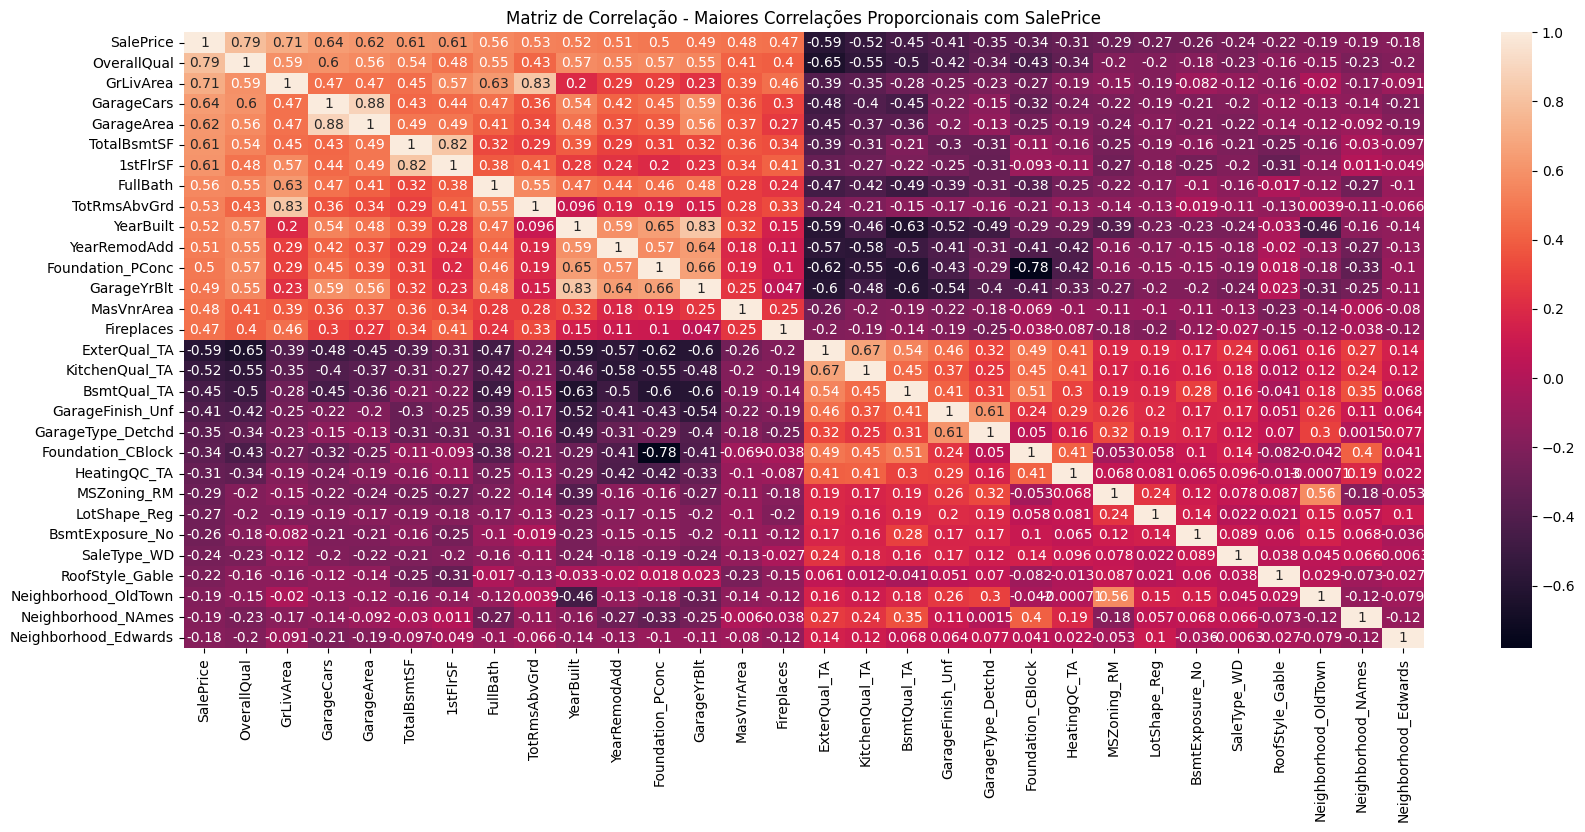

In [70]:
## Análise de Correlação
# Tratando um dataset copia somente para plotarmos correlação
corr_dataset = train.copy()
missing_threshold = 0.5 * corr_dataset.shape[0]
corr_dataset = corr_dataset.dropna(thresh=missing_threshold, axis=1)
num_features = corr_dataset.select_dtypes(include=['int64', 'float64']).columns
cat_features = corr_dataset.select_dtypes(include=['object']).columns
nominal_features = list(set(cat_features))
corr_dataset = pd.get_dummies(corr_dataset, columns=nominal_features, drop_first=True)

corr_matrix = corr_dataset.corr()

top_positive_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(15)
top_negative_corr = corr_matrix['SalePrice'].sort_values(ascending=True).head(15)
corr_table = pd.concat([top_positive_corr, top_negative_corr])
df_correlation = corr_dataset[corr_table.index].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title("Matriz de Correlação - Maiores Correlações Proporcionais com SalePrice")
plt.show()

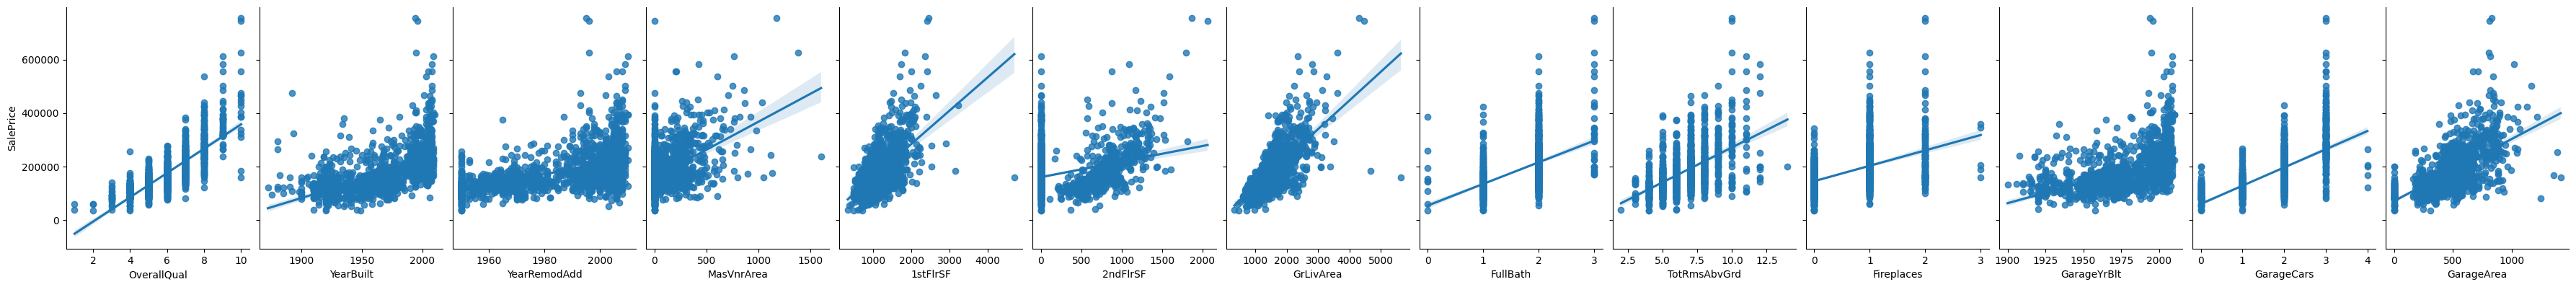

In [71]:
# Listagem de algumas variáveis para o eixo x
x_vars = [
    'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
    'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageYrBlt', 'GarageCars', 'GarageArea'
]

# Criação do pairplot com a lista completa de variáveis em x_vars e 'SalePrice' em y_vars
sns.pairplot(train, x_vars=x_vars, y_vars=['SalePrice'], height=4, aspect=0.7, kind='reg')
plt.show()

### 2. Pré-Processamento

Tratando os dados pós coleta e análise, para conseguir preparar um bom set de dados no momento de treino.

### Tratamento Dados

#### Tratamento de Dados Ausentes

Para poder seguir com algumas análises nos cados como a correlacao, sera necessario fazer a tratativa de alguns dados que estao ausentes

Identificamos e tratamos os valores ausentes para melhorar a qualidade dos dados. As variáveis são ajustadas conforme necessário para garantir que não comprometam a análise posterior e a modelagem.

Define um limite para valores ausentes em cada coluna. Esse limite é calculado como 50% do total de linhas do dataset. Assim, colunas com mais de 50% de valores ausentes serão consideradas para remoção.

Cria um objeto SimpleImputer para preencher valores ausentes nas colunas numéricas. A estratégia median indica que os valores ausentes serão preenchidos com a mediana de cada coluna e Aplica o num_imputer às colunas numéricas, substituindo os valores ausentes pela mediana de cada coluna. O resultado é atribuído de volta às colunas numéricas.

Cria outro SimpleImputer para as colunas categóricas, onde os valores ausentes serão preenchidos com o valor mais frequente em cada coluna e Aplica o cat_imputer às colunas categóricas, substituindo os valores ausentes pelo valor mais frequente de cada coluna categórica.

In [72]:
missing_threshold = 0.5 * train.shape[0]
train = train.dropna(thresh=missing_threshold, axis=1)
num_features = train.select_dtypes(include=['int64', 'float64']).columns
cat_features = train.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
train[num_features] = num_imputer.fit_transform(train[num_features])
train[cat_features] = cat_imputer.fit_transform(train[cat_features])

#### Codificacao de Variaveis Categoricas

Aplicamos One-Hot Encoding para variáveis nominais e Ordinal Encoding para variáveis com ordem natural, como OverallQual e OverallCond, que avaliam a qualidade e condição geral da casa.

**Nota:** Usamos informações da descrição dos dados para selecionar corretamente as variáveis ordinais.

Usa pd.get_dummies para aplicar One-Hot Encoding às variáveis categóricas nominais em nominal_features. drop_first=True elimina a primeira categoria de cada variável nominal para evitar multicolinearidade nos modelos (evitando que a soma das colunas represente uma variável dependente).

In [73]:
nominal_features = list(set(cat_features))
train = pd.get_dummies(train, columns=nominal_features, drop_first=True)

#### Engenharia de Atributos

Criadas novas variáveis derivadas de outras colunas para melhor representar aspectos estruturais das casas, como TotalBathrooms e TotalSF, que agregam áreas e banheiros. Além disso, aplicamos transformações logarítmicas em variáveis com distribuição assimétrica.

Cria uma nova coluna TotalBathrooms, que representa o total de banheiros na casa. A fórmula considera que um banheiro completo (FullBath) tem peso 1, enquanto um meio banheiro (HalfBath) tem peso 0,5. Isso permite uma única métrica para o total de banheiros, que facilita a análise.

Cria a coluna TotalSF, representando a área total da casa em pés quadrados. Soma TotalBsmtSF (área do porão), 1stFlrSF (área do primeiro andar) e 2ndFlrSF (área do segundo andar), consolidando todas as áreas para criar uma métrica abrangente de espaço.

Aplica uma transformação logarítmica à variável GrLivArea (área habitável acima do solo) usando np.log1p, que calcula o logaritmo natural de (1 + valor). A transformação logarítmica reduz a assimetria da distribuição de GrLivArea, tornando-a mais parecida com uma distribuição normal. Isso beneficia muitos modelos de machine learning.

Aplica a mesma transformação logarítmica à variável alvo SalePrice (preço de venda da casa). Essa transformação ajuda a reduzir a influência de valores de preço extremos, beneficiando modelos que assumem uma distribuição aproximadamente normal da variável alvo.

In [74]:
train['TotalBathrooms'] = train['FullBath'] + (0.5 * train['HalfBath'])
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['GrLivArea'] = np.log1p(train['GrLivArea'])
train['SalePrice'] = np.log1p(train['SalePrice'])

In [75]:
# Lista de colunas que não devem ser removidas
columns_not_remove = [
    'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalSF',
    'GrLivArea', 'TotalBathrooms', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'
]

# Obter as colunas que devem ser removidas, ou seja, que não estão em columns_not_remove
columns_to_remove = [col for col in corr_matrix.columns if col not in columns_not_remove]

# Remover as colunas do DataFrame
train = train.drop(columns=columns_to_remove)

## Explicar todas as colunas que sobraram

In [76]:
train.info()
train.describe()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OverallQual     1460 non-null   float64
 1   YearBuilt       1460 non-null   float64
 2   YearRemodAdd    1460 non-null   float64
 3   MasVnrArea      1460 non-null   float64
 4   GrLivArea       1460 non-null   float64
 5   TotRmsAbvGrd    1460 non-null   float64
 6   Fireplaces      1460 non-null   float64
 7   GarageYrBlt     1460 non-null   float64
 8   GarageCars      1460 non-null   float64
 9   GarageArea      1460 non-null   float64
 10  SalePrice       1460 non-null   float64
 11  TotalBathrooms  1460 non-null   float64
 12  TotalSF         1460 non-null   float64
dtypes: float64(13)
memory usage: 148.4 KB


OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
GrLivArea         0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt       0
GarageCars        0
GarageArea        0
SalePrice         0
TotalBathrooms    0
TotalSF           0
dtype: int64

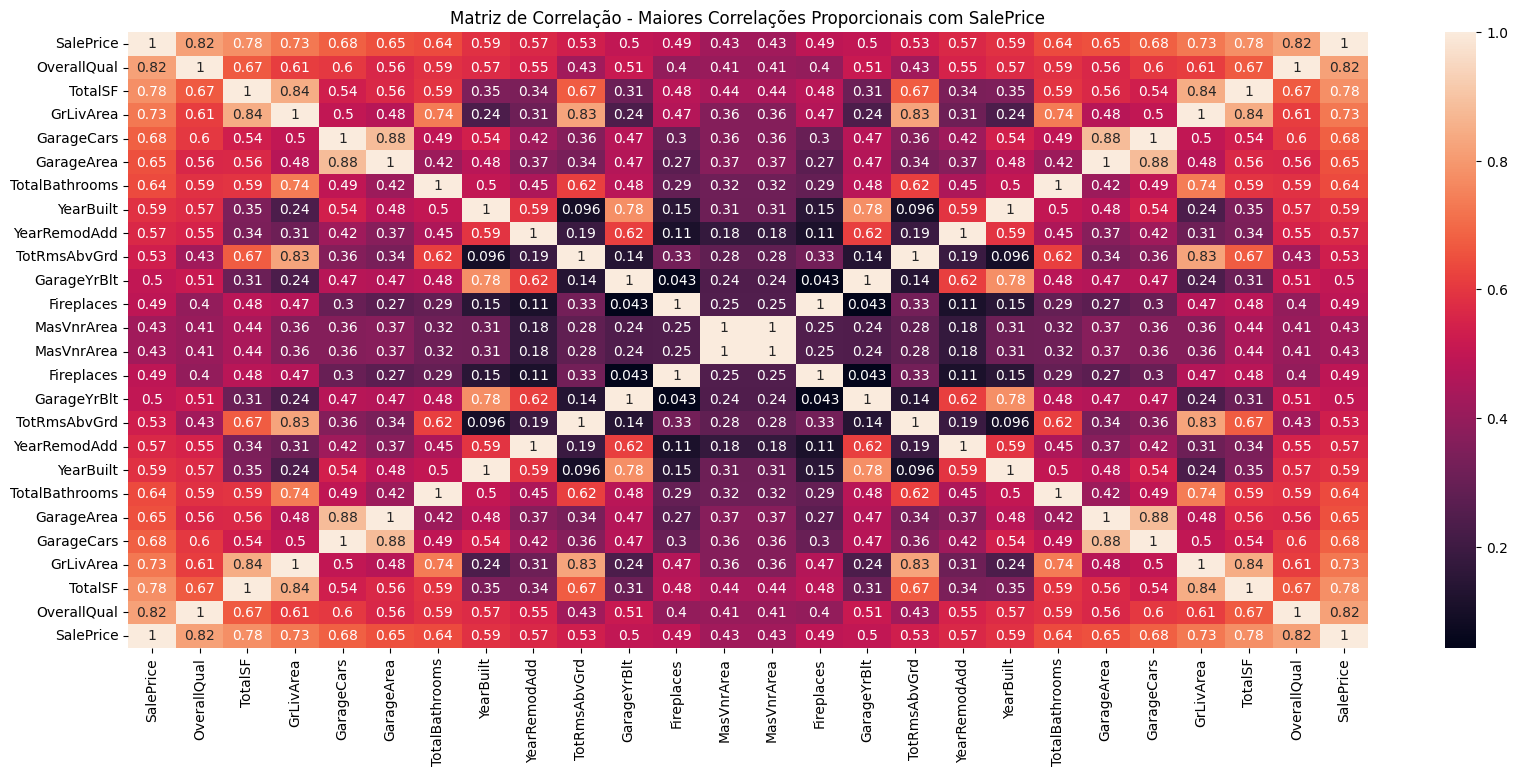

In [77]:
# Calcular a matriz de correlação
corr_matrix = train.corr()

top_positive_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(15)
top_negative_corr = corr_matrix['SalePrice'].sort_values(ascending=True).head(15)
corr_table = pd.concat([top_positive_corr, top_negative_corr])
df_correlation = train[corr_table.index].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title("Matriz de Correlação - Maiores Correlações Proporcionais com SalePrice")
plt.show()

## 3. Modelos de Regressão

#### Modelo de Regressão Linear

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ é a saída
- $\beta_0$ é um valor de bias (deslocamento)
- $\beta_1$ é o coeficiente de $x_1$ (do primeiro atributo)
- $\beta_n$ é o coeficiente de $x_n$ (do n-ésimo atributo)

Assim, para esse problema, tem-se:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Os valores $\beta$ são chamados de **coeficientes de modelo** e são ajustados na etapa de aprendizagem, a qual acontece com o ajuste do modelo utilizando o critério dos "quadrados mínimos". Uma vez aprendidos esses parâmetros, o modelo pode ser usado de forma preditiva!

#### Avalaidando Resultados Finais do Pre Processamento

Graficos

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

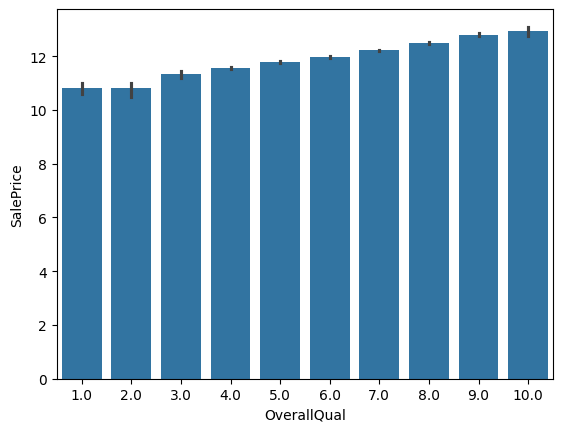

In [78]:
sns.barplot(x=train['OverallQual'], y=train['SalePrice'])

In [79]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

In [80]:
# Travando a seed
np.random.seed(1)
tf.random.set_seed(1)

# Separacao de attr e classe
X_train_cols = train.drop(['SalePrice'], axis=1)
y_train_col = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_train_cols, y_train_col, test_size = 0.3, shuffle=True, random_state=1)

In [81]:
normalizer = Normalization()
normalizer.adapt(X_train.values)

### Regressão Linear usando Keras

Epoch 1/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0198 - val_loss: 12.0326
Epoch 2/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9962 - val_loss: 12.0099
Epoch 3/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9731 - val_loss: 11.9871
Epoch 4/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9500 - val_loss: 11.9643
Epoch 5/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9268 - val_loss: 11.9416
Epoch 6/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9037 - val_loss: 11.9188
Epoch 7/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.8806 - val_loss: 11.8961
Epoch 8/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.8539 - val_loss: 11.8733
Epoch 9/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.8343 - val_loss: 11.8505
Epoch 10/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.8110 - val_loss: 11.8278
Epoch 11/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7898 - val_loss: 11.8050
Epoch 12/580
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

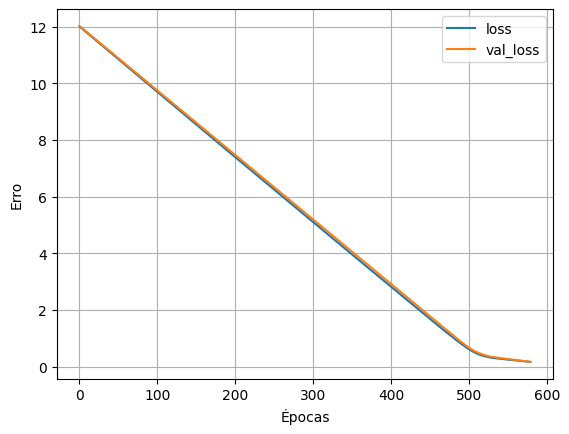

In [82]:
# Escolha um modelo e treine-o
model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=580, validation_split = 0.3)
plot_loss(history)

# Avalie o modelo
y_pred = model.predict(X_test)
print("MAE: " , model.evaluate(X_test, y_test))
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

y_pred = y_pred.flatten()
# Reverter a transformação logarítmica para escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

Média de Entrada: 179714.07305936073
Média Prevista: 171021.05


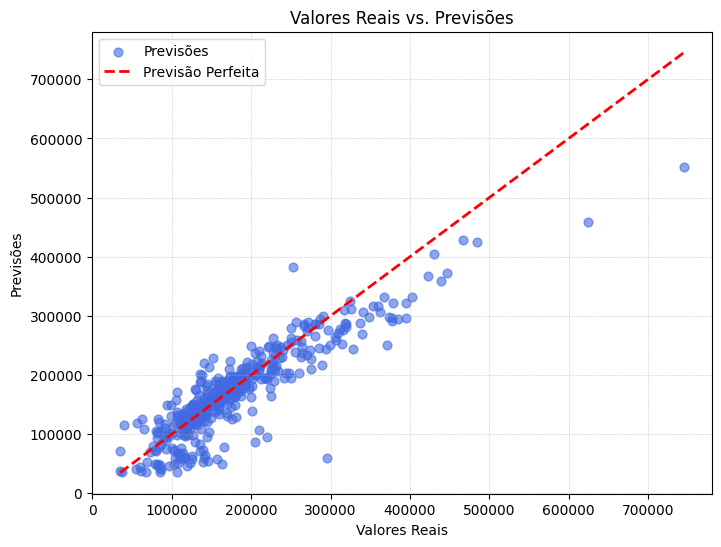

In [83]:
print('Média de Entrada:', y_test_original.mean())
print('Média Prevista:', y_pred_original.mean())

# Visualizar os resultados com ajustes
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, color='royalblue', alpha=0.6, s=40, label='Previsões')

# Adicionar uma linha de referência para a previsão perfeita
max_val = max(max(y_test_original), max(y_pred_original))
min_val = min(min(y_test_original), min(y_pred_original))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')

# Configurações do gráfico
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

#### Salvando CSV de previsões

In [84]:
submission_df = pd.DataFrame({
    'Id': X_test.index,
    'SalePrice': y_pred_original
})

# Salvando o DataFrame como um arquivo CSV
submission_df.to_csv(os.path.join(current_dir, '..', 'data', 'regression', 'submission.csv'), index=False)

### Redes Neurais usando Keras

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 12)             │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (104.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 25 (104.00 B)

Epoch 1/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.3180 - val_loss: 10.9384
Epoch 2/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.7625 - val_loss: 10.3038
Epoch 3/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1043 - val_loss: 9.4895
Epoch 4/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2720 - val_loss: 8.4377
Epoch 5/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2406 - val_loss: 7.3690
Epoch 6/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2316 - val_loss: 6.3301
Epoch 7/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2100 - val_loss: 5.2275
Epoch 8/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0776 - val_loss: 4.4746
Epoch 9/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2931 - val_loss: 4.1366
Epoch 10/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9792 - val_loss: 3.9663
Epoch 11/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7991 - val_loss: 3.8182
Epoch 12/60
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6444 - v

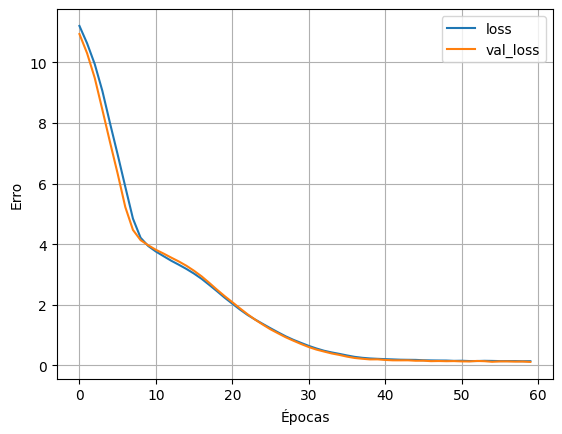

In [85]:
model = keras.Sequential([
    normalizer,
    layers.Dense(10),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
])

model.summary()

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=60, validation_split = 0.3)

plot_loss(history)

y_pred = model.predict(X_test)
print("MAE: " , model.evaluate(X_test, y_test))
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

y_pred = y_pred.flatten()
# Reverter a transformação logarítmica para escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

### Árvore de Decisão

Test MAE:  0.1577347695395038
Test MSE:  0.05154453013960133
Test R2:  0.7272586112531676


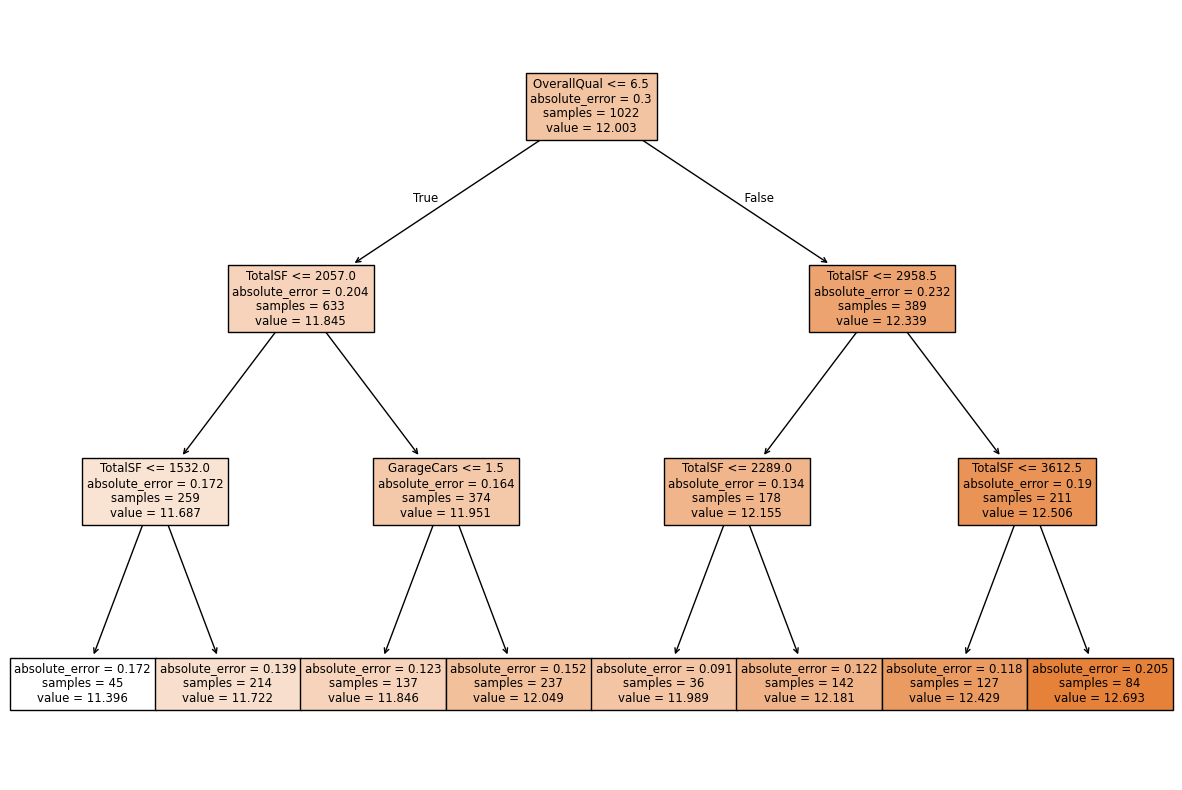

In [89]:
# Inicialize o regressor com o critério 'absolute_error' e profundidade máxima
regressor = DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

# Treine o modelo com os dados de treino
regressor = regressor.fit(X_train, y_train)

# Avalie o desempenho no conjunto de teste
test_predictions = regressor.predict(X_test)
print("Test MAE: ", mean_absolute_error(y_test, test_predictions))
print("Test MSE: ", mean_squared_error(y_test, test_predictions))
print("Test R2: ", r2_score(y_test, test_predictions))

# Plot da árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show()